<a href="https://colab.research.google.com/github/manhanton/DataInsight/blob/master/RQE_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yothinpukongnin","key":"19b2ad65ec7effd72b16da3d1c6822ab"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d yothinpukongnin/naphtha-plant-parameters

 81% 79.0M/97.1M [00:00<00:00, 133MB/s]
100% 97.1M/97.1M [00:00<00:00, 166MB/s]


In [8]:
!ls -l

total 99444
-rw-r--r-- 1 root root        71 Jul 15 14:15 kaggle.json
-rw-r--r-- 1 root root 101820287 Jul 15 14:16 naphtha-plant-parameters.zip
drwxr-xr-x 1 root root      4096 Jul  1 13:42 sample_data


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('naphtha-plant-parameters.zip', 'r')
zip_ref.extractall('naphtha-plant-parameters')
zip_ref.close()

# Read X,Y 

In [10]:
import pandas as pd

X = pd.read_csv('/content/naphtha-plant-parameters/feature_rqe.csv',index_col=['Date'],parse_dates=['Date'])
X.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio.PV
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:04:00,5473.115629,5131.270807,318.080306,1110.856587,2652.403192,378.712819,366.279280,0.0,79.701140,194.491751,60.547472,58.852298,24.016814,10.497668,11.652334,0.834066,0.630034,4.752970,24.043402,51.195625,28.041724,144.512998,208.840214,243.111857,112.372064,88.870162,241.940469,343.354577,38.542668,70.452314,197.887329,285.656868,106.394233,146.499334,128.536175,49.473139,40.006120,14.545120,5303.841444,2665.373443,60.040290,0.903485,93.240690,9.667305,4336.169676,21.609391,285.494263,106.452896,145.46529,128.833672,45.0,36.0,14.520891,5331.302148,2670.724609,60.580307,0.900216,93.251854,52.166014,49.940832,33.136327,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.262487,53.586819,3.527493
2020-11-01 00:09:00,5471.262006,5081.340493,319.134491,1127.566286,2613.794010,377.868390,365.343753,0.0,79.617879,192.836177,60.096630,58.280724,24.013384,10.497708,11.660985,0.829459,0.630034,4.752970,23.962653,51.796681,28.057927,144.512998,208.929525,243.075671,112.464136,88.850364,241.935133,343.380525,38.678531,69.869067,197.858310,285.673758,106.664452,146.499334,126.501183,49.473139,40.022194,14.574691,5276.190712,2632.420992,60.727247,0.903363,93.232823,35.188276,4345.833726,21.527866,285.494263,106.452896,145.46529,126.396324,45.0,36.0,14.561488,5309.172892,2682.431335,60.580307,0.900216,93.251854,52.141203,50.735290,32.704735,43.0,100.0,100.0,86.859383,59.032778,73.733595,60.318392,23.849853,53.882208,3.533201
2020-11-01 00:14:00,5479.180273,5095.179997,320.846591,1151.931683,2623.871195,377.715600,365.788448,0.0,80.304881,193.040518,59.783207,59.298287,24.009096,10.497748,11.633449,0.830741,0.630034,4.752970,24.047131,51.983227,28.074130,144.512998,208.910153,243.039486,112.433805,88.810572,241.933245,343.406473,38.814394,70.174556,197.915019,285.690649,106.954351,146.499334,129.400508,49.473139,40.038268,14.572604,5287.183491,2710.119549,60.871342,0.896268,93.224957,29.750202,4347.991391,21.533805,285.494263,106.452896,145.46529,130.537319,45.0,36.0,14.575893,5284.822754,2705.031921,60.580307,0.900216,93.251854,52.111623,51.563165,32.817743,43.0,100.0,100.0,86.853345,58.904995,73.688091,60.304167,22.652932,54.369436,3.583727
2020-11-01 00:19:00,5482.488939,5129.542230,312.939935,1139.550162,2629.460838,377.889966,363.793576,0.0,80.337485,194.293915,59.983354,59.443846,24.004808,10.497787,11.640080,0.832466,0.630034,4.745240,23.951757,51.737983,28.090332,144.512998,208.767856,242.998496,112.295493,88.734148,241.690956,343.432421,38.860547,70.411297,197.742795,285.707539,106.722817,146.499334,128.764363,49.473139,40.054342,14.556982,5311.669655,2652.031082,59.714397,0.906447,93.227449,35.579547,4322.910183,21.589241,285.494263,106.452896,145.46529,129.532226,45.0,36.0,14.564852,5298.561816,2649.272461,60.580307,0.900216,93.251854,52.185040,51.476455,33.016266,43.0,100.0,100.0,86.847307,58.570629,73.642587,60.289942,23.154551,53.570654,3.624642
2020-11-01 00:24:00,5481.876385,5158.356666,314.052522,1139.861553,2650.732445,377.816851,365.197092,0.0,79.785829,193.016933,60.252414,58.730868,24.000520,10.497827,11.652632,0.826482,0.630034,4.734404,24.035497,51.858895,28.1

In [11]:
Y = pd.read_csv('/content/naphtha-plant-parameters/label_rqe.csv',index_col=['Date'],parse_dates=['Date'])
Y.head()

,27Q001.PV,27Q001.PV (t+1),27Q001.PV (t+2),27Q001.PV (t+3),27Q001.PV (t+4),27Q001.PV (t+5),27Q001.PV (t+6),27Q001.PV (t+7),27Q001.PV (t+8),27Q001.PV (t+9),27Q001.PV (t+10),27Q001.PV (t+11),27Q001.PV (t+12),27Q001.PV (t+13),27Q001.PV (t+14),27Q001.PV (t+15),27Q001.PV (t+16),27Q001.PV (t+17),27Q001.PV (t+18),27Q001.PV (t+19),27Q001.PV (t+20),27Q001.PV (t+21),27Q001.PV (t+22),27Q001.PV (t+23),27Q001.PV (t+24),27Q001.PV (t+25),27Q001.PV (t+26),27Q001.PV (t+27),27Q001.PV (t+28),27Q001.PV (t+29),27Q001.PV (t+30),27Q001.PV (t+31),27Q001.PV (t+32),27Q001.PV (t+33),27Q001.PV (t+34),27Q001.PV (t+35),27Q001.PV (t+36),27Q001.PV (t+37),27Q001.PV (t+38),27Q001.PV (t+39),27Q001.PV (t+40),27Q001.PV (t+41),27Q001.PV (t+42),27Q001.PV (t+43),27Q001.PV (t+44),27Q001.PV (t+45),27Q001.PV (t+46),27Q001.PV (t+47),27Q001.PV (t+48),27Q001.PV (t+49)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:04:00,12.779194,12.792132,12.795286,12.808824,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132
2020-11-01 00:09:00,12.792132,12.795286,12.808824,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132,12.596489
2020-11-01 00:14:00,12.795286,12.808824,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132,12.596489,12.591182
2020-11-01 00:19:00,12.808824,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132,12.596489,12.591182,12.585875
2020-11-01 00:24:00,12.829266,12.849709,12.851052,12.851810,12.861214,12.880084,12.879793,12.878100,12.881130,12.871055,12.860981,12.850906,12.840832,12.830757,12.820683,12.810608,12.800805,12.801937,12.797616,12.791652,12.784196,12.776741,12.757459,12.749607,12.741755,12.723125,12.702931,12.683241,12.670008,12.656790,12.643573,12.630355,12.611044,12.597864,12.596291,12.593230,12.588513,12.584035,12.585688,12.566259,12.567519,12.577030,12.574822,12.581951,12.583407,12.599132,12.596489,12.591182,12.585875,12.586148


# Data Prep

In [14]:
# Import Library

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification, make_blobs, load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split

In [19]:
# Set label
y = Y

# Split Train & Test
split_size = int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

# Scaler 
scaler = MinMaxScaler()  # Change type of scaler here 
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns = X_train.columns)
normalized_x_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns)
#normalized_y_train = pd.DataFrame(scaler.fit_transform(y_train), index=y_train.index , columns = y_train.columns)
#normalized_y_test = pd.DataFrame(scaler.transform(y_test), index=y_test.index , columns = y_test.columns)

In [18]:
X.shape[0], y.shape[0]

(31055, 31055)

In [22]:
# Regression 
results = []

for i in range(1,50):
    model = LinearRegression()
    model_fit = model.fit(normalized_x_train, y_train.iloc[:,i])
    y_test_pred = model_fit.predict(normalized_x_test)
    result = r2_score(y_test.iloc[:,i], y_test_pred)
    results.append(result)

# R-squared
results

[0.6595330194069638,
 0.6572208627683853,
 0.6489351955517919,
 0.6514949074703333,
 0.6575820050998328,
 0.6664736038724062,
 0.6626873185957073,
 0.6563122332793941,
 0.6603132103826558,
 0.6615292583859472,
 0.667702838445382,
 0.6828511786935079,
 0.6904490413818555,
 0.692505005464946,
 0.687974004739108,
 0.6881966336818467,
 0.6996346259378863,
 0.728235098421643,
 0.753706800680574,
 0.7703488485181059,
 0.7863500475279183,
 0.7969990460869355,
 0.8049891902229269,
 0.8085800069817877,
 0.8063094450085005,
 0.8047409536219103,
 0.8014983054441639,
 0.7949688966737809,
 0.7978255636340287,
 0.8006213592017196,
 0.7958861152736914,
 0.7888230901912077,
 0.7766793781072945,
 0.7678980002468662,
 0.7728363787816291,
 0.7733540081108623,
 0.7836566601995496,
 0.7872416702581809,
 0.7901436926898482,
 0.7938956391762767,
 0.7923286905437866,
 0.8000472519908989,
 0.8101749198540942,
 0.8193774007081509,
 0.8238778343645476,
 0.8254511033285904,
 0.8254028569471822,
 0.824075884990759

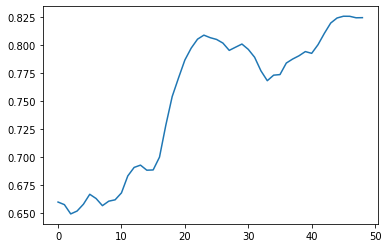

In [23]:
import numpy as np

plt.plot(results)

In [37]:
def correlation_heatmap(df, cutoff=None, title=''):
    df_corr = df.corr('pearson')
    np.fill_diagonal(df_corr.values, 0)
    if cutoff != None:
        for col in df_corr.columns:
            df_corr.loc[df_corr[col].abs() < cutoff, col] = 0
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.heatmap(df_corr, ax=ax, cmap='RdBu_r')
    plt.suptitle(title, size=18)
    plt.show()
    return df_corr

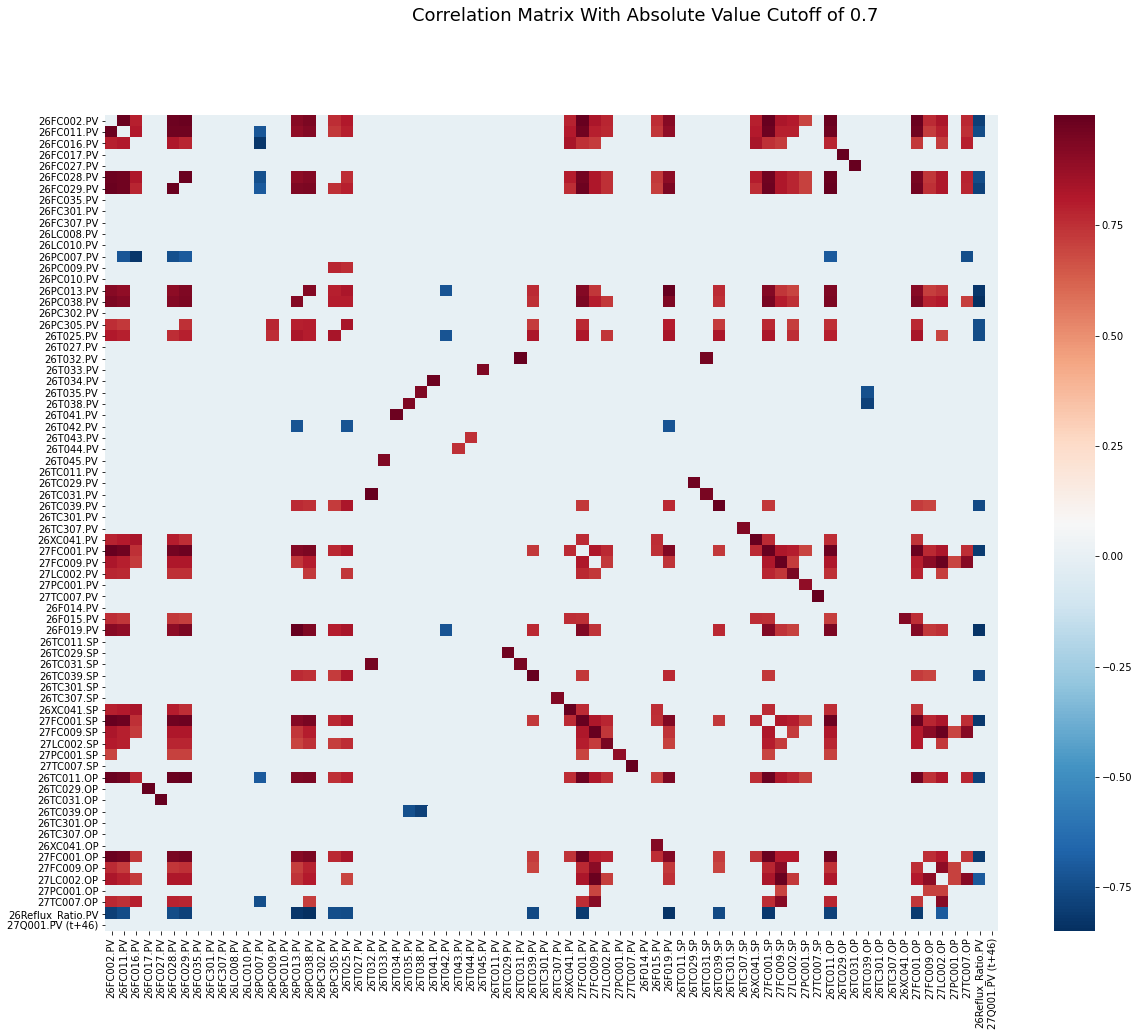

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,26Reflux_Ratio.PV,27Q001.PV (t+46)
26FC002.PV,0.000000,0.989080,0.792691,0.0,0.0,0.981869,0.986025,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.915486,0.945870,0.0,0.754892,0.813465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.790550,0.993482,0.827095,0.783087,0.0,0.0,0.0,0.761083,0.919081,0.0,0.0,0.0,0.000000,0.0,0.0,0.790833,0.995762,0.827651,0.808048,0.70355,0.0,0.986044,0.000000,0.000000,0.0,0.0,0.0,0.0,0.987740,0.763212,0.831335,0.000000,0.773442,-0.791937,0.0
26FC011.PV,0.989080,0.000000,0.812379,0.0,0.0,0.975384,0.974513,0.0,0.0,0.0,0.0,0.0,-0.713161,0.0,0.0,0.893399,0.922114,0.0,0.728388,0.790655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.809931,0.977889,0.793550,0.771823,0.0,0.0,0.0,0.736860,0.895954,0.0,0.0,0.0,0.000000,0.0,0.0,0.810266,0.980280,0.794049,0.796284,0.00000,0.0,0.974492,0.000000,0.000000,0.0,0.0,0.0,0.0,0.972999,0.723872,0.797375,0.000000,0.753829,-0.750340,0.0
26FC016.PV,0.792691,0.812379,0.000000,0.0,0.0,0.822342,0.782676,0.0,0.0,0.0,0.0,0.0,-0.826100,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.840758,0.747510,0.718495,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.841031,0.748328,0.718820,0.000000,0.00000,0.0,0.782609,0.000000,0.000000,0.0,0.0,0.0,0.0,0.731150,0.000000,0.720972,0.000000,0.790800,0.000000,0.0
26FC017.PV,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.999753,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
26FC027.PV,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.996714,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27LC002.OP,0.831335,0.797375,0.720972,0.0,0.0,0.826387,0.824118,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.741892,0.810797,0.0,0.000000,0.701251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.827998,0.990512,0.716087,0.0,0.0,0.0,0.000000,0.747979,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.829130,0.992323,0.726262,0.00000,0.0,0.824105,0.000000,0.000000,0.0,0.0,0.0,0.0,0.808800,0.902383,0.000000,0.705359,0.914915,-0.701879,0.0
27PC001.OP,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [38]:
cutoff = .7
correlation_heatmap(df, 
                    cutoff, 'Correlation Matrix With Absolute Value Cutoff of {}'.format(cutoff))

In [33]:
corr.loc[:,['27Q001.PV (t+46)']].sort_values('27Q001.PV (t+46)')[-10:]

,27Q001.PV (t+46)
27LC002.SP,0.336261
26FC029.PV,0.336478
26TC011.OP,0.336639
26FC011.PV,0.349097
26FC028.PV,0.351130
27FC001.PV,0.352840
27FC001.SP,0.353511
26FC002.PV,0.362661
27FC001.OP,0.375784
27Q001.PV (t+46),1.000000


In [30]:
corr.loc[:,['27Q001.PV (t+46)']].sort_values('27Q001.PV (t+46)')[:10]

,27Q001.PV (t+46)
26T045.PV,-0.397433
26TC029.PV,-0.365041
26TC029.SP,-0.356516
26TC031.PV,-0.354845
26T032.PV,-0.352529
26TC031.SP,-0.336243
27TC007.SP,-0.317148
27TC007.PV,-0.316314
26Reflux_Ratio.PV,-0.289350
26TC307.PV,-0.272614


In [39]:
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
# define two data frames one before the drop and one after the drop
df_before = df
df_after = df.drop(columns=['26TC011.SP','26TC029.SP','26TC031.SP','26TC039.SP',
                            '26TC301.SP','26TC307.SP','26XC041.SP','27FC001.SP',
                            '27FC009.SP','27LC002.SP','27PC001.SP','27TC007.SP',
                            '27Q001.PV (t+46)'])

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method

X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                1.667515e+08
26FC002.PV           7.904452e+02
26FC011.PV           3.165167e+02
26FC016.PV           1.633995e+02
26FC017.PV           2.103325e+03
                         ...     
27LC002.OP           1.003818e+02
27PC001.OP           5.574901e+00
27TC007.OP           7.695427e+01
26Reflux_Ratio.PV    1.468258e+02
27Q001.PV (t+46)     2.862049e+00
Length: 73, dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                5.090538e+06
26FC002.PV           6.426721e+02
26FC011.PV           2.653543e+02
26FC016.PV           1.549708e+02
26FC017.PV           2.095721e+03
26FC027.PV           2.963164e+02
26FC028.PV           5.287323e+02
26FC029.PV           6.639357e+03
26FC035.PV           5.444348e+00
26FC301.PV           1.830845e+00
26FC307.PV           4.375680e+00
26LC008.PV           4.100331e+00
26LC010.PV           4.169371e+00
26PC007.PV           7.361406e+00
26PC009.PV           2.968090e+01
26PC010.PV           6.917031e+00
26PC013.PV           1.219522e+03
26PC038.PV           4.529973e+01
26PC302.PV           1.481275e+00
26PC305.PV           1.469225e+01
26T025.PV            6.742035e+01
26T027.PV            6.370660e+00
26T032.PV            1.827207e+03
26T033.PV            1.200918e+02
26T034.PV            1.539384e+02
26T035.PV            4.313560e+02
26T038.PV            3.693596e+02
26T041.PV            2.656401e+02
26T042.PV            3.782680e+01
26T043.PV     

In [ ]:
# define the plot
pd.plotting.scatter_matrix(df_after, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()